In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
# The code was removed by Watson Studio for sharing.

--2020-12-18 05:37:38--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.1s    

2020-12-18 05:37:39 (474 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [8]:
df=pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.shape

(1067, 13)

In [5]:
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

Text(0.5, 1.0, 'Engine Size vs CO2 Emission')

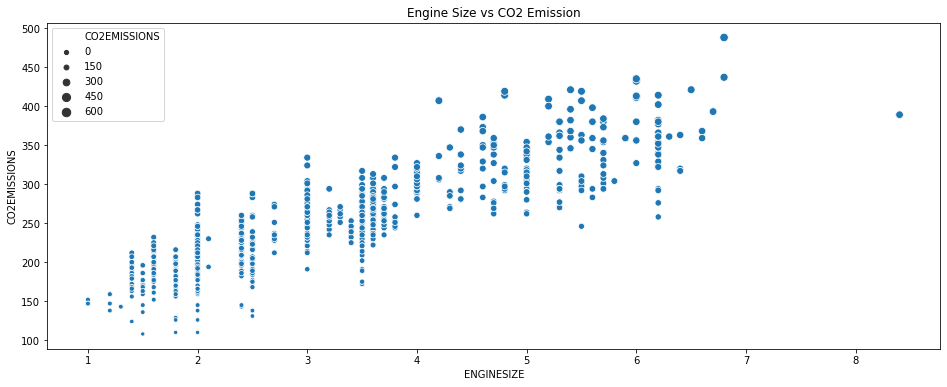

In [21]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x=df['ENGINESIZE'],y=df['CO2EMISSIONS'],data=df,size='CO2EMISSIONS')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.title('Engine Size vs CO2 Emission')

### As the engine size increasing co2 emission is also increasing 

#### Let's explore other variable also 

In [22]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

Text(0.5, 1.0, 'MODEL vs CO2 Emission')

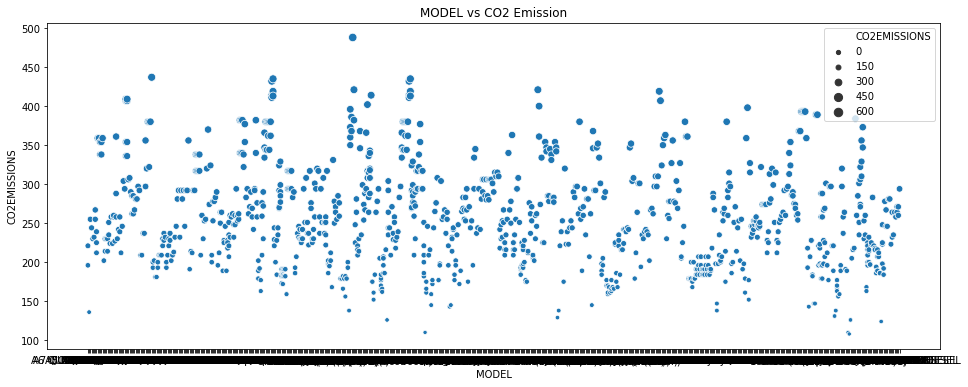

In [23]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x=df['MODEL'],y=df['CO2EMISSIONS'],data=df,size='CO2EMISSIONS')
plt.xlabel('MODEL')
plt.ylabel('CO2EMISSIONS')
plt.title('MODEL vs CO2 Emission')

### Data points scattred all over the graph ,so we can say there is no relationshio between co2emission .<br>
### So we should drop this variable before making ML model

Text(0.5, 1.0, 'CYLINDERS vs CO2 Emission')

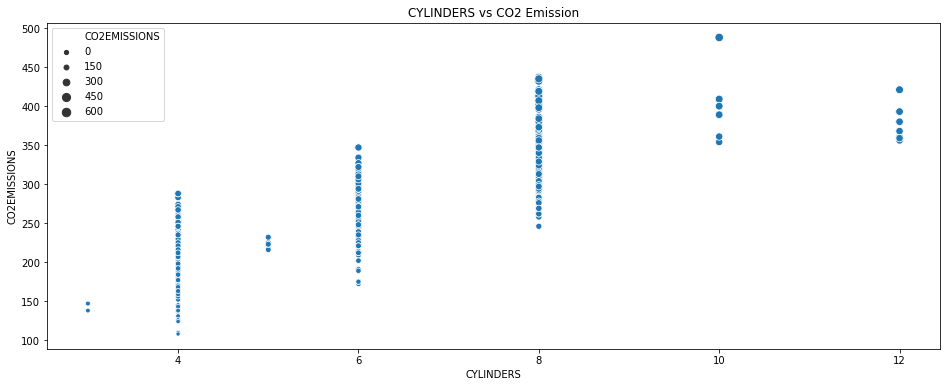

In [29]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x=df['CYLINDERS'],y=df['CO2EMISSIONS'],data=df,size='CO2EMISSIONS')
plt.xlabel('CYLINDERS')
plt.ylabel('CO2EMISSIONS')
plt.title('CYLINDERS vs CO2 Emission')

### Increase in cylinder increases the co2 emission

Text(0, 0.5, 'CO2EMISSIONS')

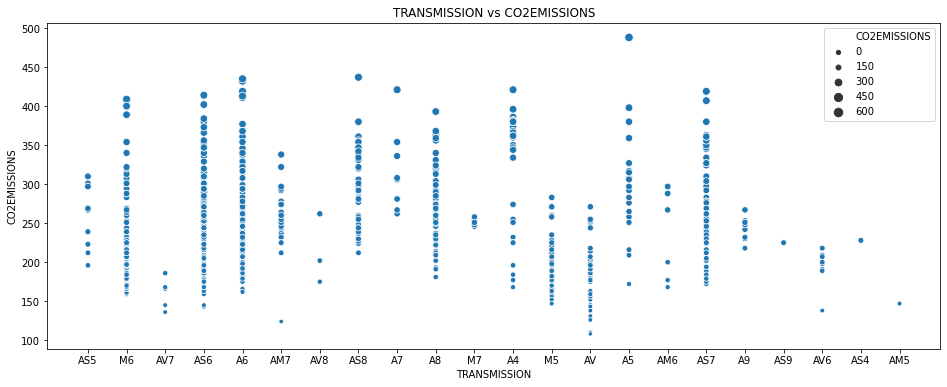

In [31]:
plt.figure(figsize=(16,6))
sns.scatterplot(x=df['TRANSMISSION'],y=df['CO2EMISSIONS'],data=df,size='CO2EMISSIONS')
plt.title('TRANSMISSION vs CO2EMISSIONS')
plt.xlabel('TRANSMISSION')
plt.ylabel('CO2EMISSIONS')

### No Releationship between Emission and Transmission 

In [32]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [33]:
df['FUELTYPE'].value_counts()

X    514
Z    434
E     92
D     27
Name: FUELTYPE, dtype: int64

Text(0, 0.5, 'CO2EMISSIONS')

<Figure size 1152x432 with 0 Axes>

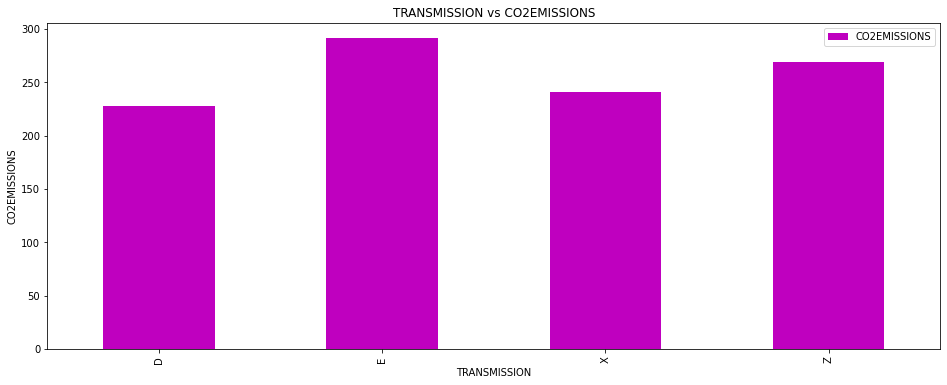

In [35]:
plt.figure(figsize=(16,6))
df[['FUELTYPE','CO2EMISSIONS']].groupby('FUELTYPE').mean().plot(kind='bar',color='m',figsize=(16,6))
plt.title('TRANSMISSION vs CO2EMISSIONS')
plt.xlabel('TRANSMISSION')
plt.ylabel('CO2EMISSIONS')

In [9]:
columns=list(df.describe().columns[:-1])

In [44]:
for c in columns:
    print('Correlation between {} and CO2EMISSION is:\n{}\n\n'.format(c,df[[c,'CO2EMISSIONS']].corr()))

Correlation between MODELYEAR and CO2EMISSION is:
              MODELYEAR  CO2EMISSIONS
MODELYEAR           NaN           NaN
CO2EMISSIONS        NaN           1.0


Correlation between ENGINESIZE and CO2EMISSION is:
              ENGINESIZE  CO2EMISSIONS
ENGINESIZE      1.000000      0.874154
CO2EMISSIONS    0.874154      1.000000


Correlation between CYLINDERS and CO2EMISSION is:
              CYLINDERS  CO2EMISSIONS
CYLINDERS      1.000000      0.849685
CO2EMISSIONS   0.849685      1.000000


Correlation between FUELCONSUMPTION_CITY and CO2EMISSION is:
                      FUELCONSUMPTION_CITY  CO2EMISSIONS
FUELCONSUMPTION_CITY              1.000000      0.898039
CO2EMISSIONS                      0.898039      1.000000


Correlation between FUELCONSUMPTION_HWY and CO2EMISSION is:
                     FUELCONSUMPTION_HWY  CO2EMISSIONS
FUELCONSUMPTION_HWY             1.000000      0.861748
CO2EMISSIONS                    0.861748      1.000000


Correlation between FUELCONSUMPTION_C

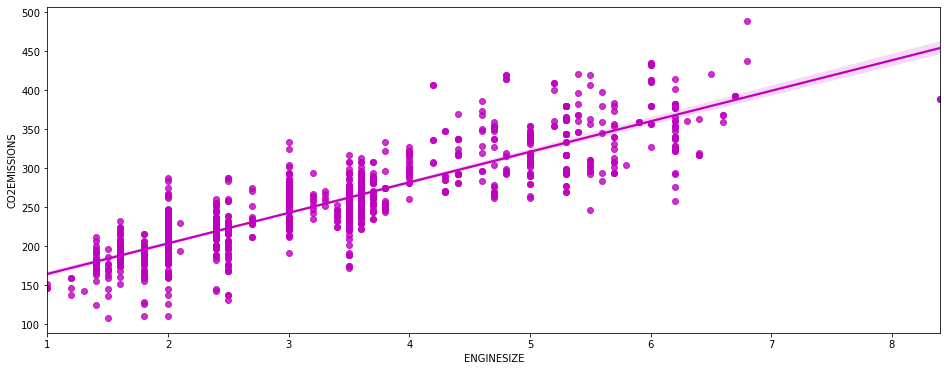

In [47]:
#checking the correlation
plt.figure(figsize=(16,6))
sns.regplot(x='ENGINESIZE',y='CO2EMISSIONS',data=df,color='m')

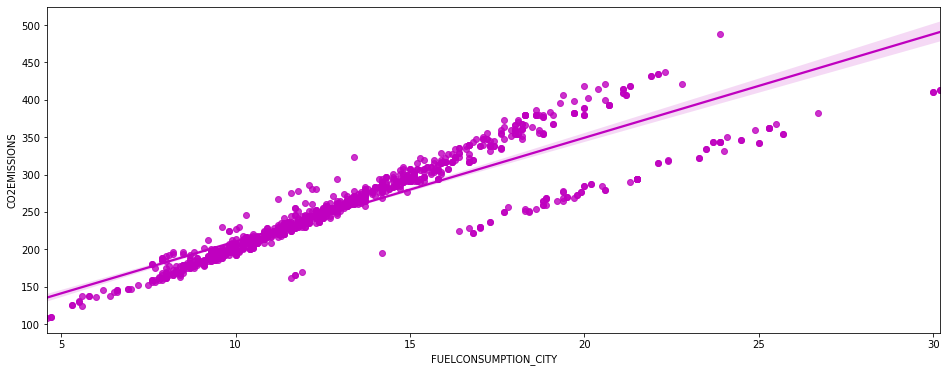

In [49]:
plt.figure(figsize=(16,6))
sns.regplot(x='FUELCONSUMPTION_CITY',y='CO2EMISSIONS',data=df,color='m')

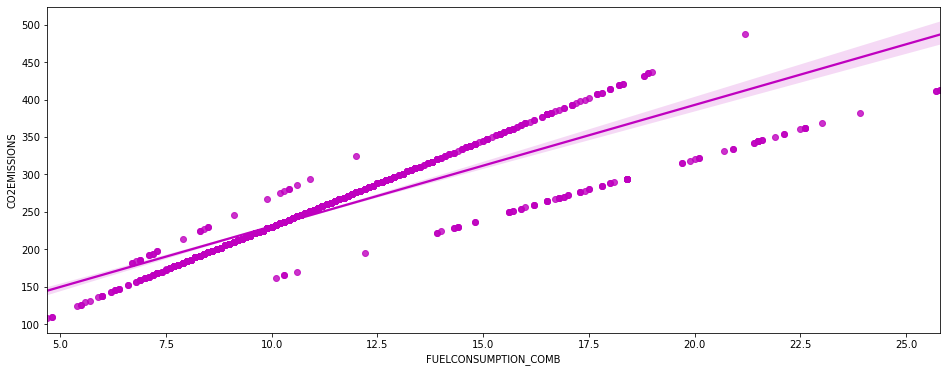

In [51]:
plt.figure(figsize=(16,6))
sns.regplot(x='FUELCONSUMPTION_COMB',y='CO2EMISSIONS',data=df,color='m')

#### Notice FUELCONSUMPTION_COMB, FUELCONSUMPTION_HWY etc  are for the car that has been already on the road but our goal is to predict the Co2 emission for that car that is yet to be manufactured,so we will not consider these perameters for making models.

## Features Selection 

In [52]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [10]:
X=df[['ENGINESIZE']]
y=df[['CO2EMISSIONS']]

### Since target variable 'CO2EMISSIONS' has continues values so this is clearly a Linear Regression problem.  

In [11]:
#Split the data into test and train
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

print('Train size:{}'.format(x_train.shape))
print('Test size:{}'.format(x_test.shape))

Train size:(853, 1)
Test size:(214, 1)


In [12]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

#fit the train data
lr.fit(x_train,y_train)

#predict on test data
y_pr=lr.predict(x_test)
y_pr[0:5]

print('Score:{}'.format(lr.score(x_train,y_train)))

Score:0.7639480562303455


In [13]:
#Evaulate the model
score=[]
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error,r2_score
from sklearn import metrics

print('Score:%.2f'%lr.score(x_test,y_test))
print("R2-score: %.2f" % r2_score(y_test , y_pr) )

print('RSME is :{}'.format(np.sqrt(mean_squared_error(y_pr,y_test))))
score.append(r2_score(y_test , y_pr))

Score:0.76
R2-score: 0.76
RSME is :30.90907253246805


### As we can see  r2 socre is 0.76 which is close to 1 so we can say model is making good prediction

Text(0.5, 0, 'Engine Size')

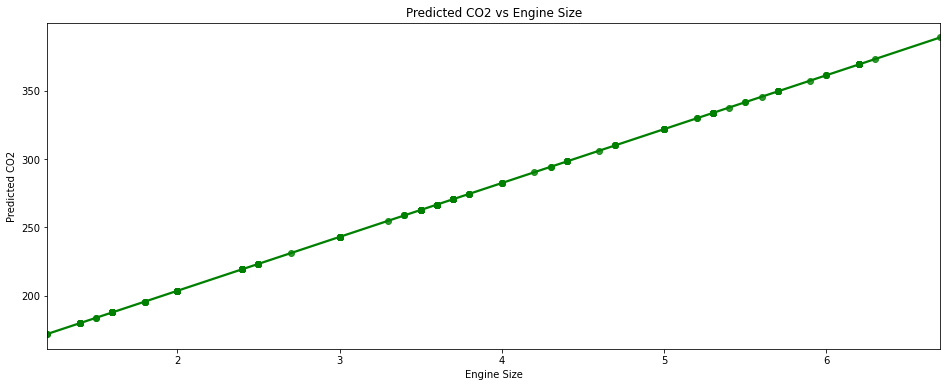

In [125]:
plt.figure(figsize=(16,6))
sns.regplot(x=x_test,y=y_pr,color='g')
plt.title('Predicted CO2 vs Engine Size')
plt.ylabel('Predicted CO2')
plt.xlabel('Engine Size')

## Let's check for multiple Linear Regression 

In [14]:
columns=list(df.describe().columns[1:])
columns

['ENGINESIZE',
 'CYLINDERS',
 'FUELCONSUMPTION_CITY',
 'FUELCONSUMPTION_HWY',
 'FUELCONSUMPTION_COMB',
 'FUELCONSUMPTION_COMB_MPG',
 'CO2EMISSIONS']

In [15]:
df[columns].corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [24]:
X=df[columns[:-3]]
y=df['CO2EMISSIONS']

In [17]:
x_train_m,x_test_m,y_train_m,y_test_m=train_test_split(X,y,test_size=0.2,random_state=4)
print('Train Size:{}'.format(x_train_m.shape))
print('Test Size:{}'.format(x_test_m.shape))

Train Size:(853, 4)
Test Size:(214, 4)


In [18]:
lr=LinearRegression()
lr.fit(x_train_m,y_train_m)
y_pr_m=lr.predict(x_test_m)

print('Varriance:{}'.format(lr.score(x_test_m,y_test_m)))
print('R2 score:%.2f'%r2_score(y_pr_m,y_test_m))
score.append(r2_score(y_pr_m,y_test_m))

Varriance:0.8898573299565156
R2 score:0.87


In [19]:
s=pd.DataFrame(score)
s.rename(columns={0: 'R2 Score'}, index={0: 'Simple Linear Regression',1:'Multiple Linear Regression'}, inplace=True)
s

,R2 Score
Simple Linear Regression,0.764481
Multiple Linear Regression,0.869171


### As we can see Multiple Lineare Regression has higher r2 score compared to Simple Linear Regression. So we can say MLR is best fit model for prediction of CO2 Emission.

Text(0.5, 0, 'Engine Size')

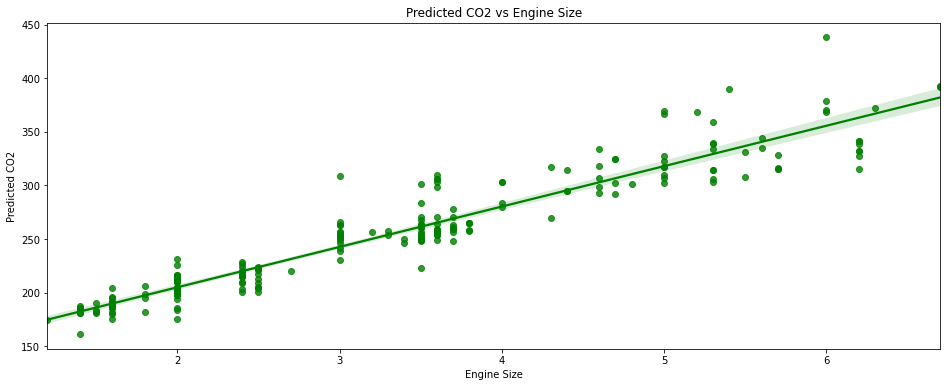

In [26]:
plt.figure(figsize=(16,6))
sns.regplot(x=x_test_m[['ENGINESIZE']],y=y_pr_m,color='g')
plt.title('Predicted CO2 vs Engine Size')
plt.ylabel('Predicted CO2')
plt.xlabel('Engine Size')